In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [120]:
#import dataset
df = pd.read_excel(r"C:\Users\hp\Downloads\Beer_Forecast.xlsx")

In [121]:
df.head()

,Beer_Non,Date,Volume,Consumer Price Index_Monthly,"Index, Retail sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly","Nominal Private Consumption, US$_Quarterly","Nominal GDP (Gross Domestic Product), US$_Quarterly","Real Consumption Per Capita, US$_Quarterly","Nominal Gross Private Saving, US$_Quarterly","Nominal Gross Domestic Saving, US$_Quarterly","Real GDP Per Capita, US$_Quarterly","Real GDP at Factor Cost:Services, US$_Quarterly",Unemployment Rate_Quarterly,Population: Age Bracket 15-64_Quarterly,Population: Age Bracket 65+_Quarterly,"Disposable Personal Income, US$_Quarterly","Disposable Personal Income, real, US$_Quarterly",T-Avg
0,BEER,2020-01-01,525295.37,102.798446,108.141005,103.139119,99.185522,921.722522,1593.451595,25821.417254,357.142569,342.117623,357.142569,342.117623,6.7000,29839396,44165323,15091280,46587473,24.5
1,BEER,2020-02-01,578702.22,102.640416,107.625725,102.585456,99.931902,921.722522,1593.451595,25821.417254,357.142569,342.117623,357.142569,342.117623,6.7000,36582530,55354202,22069681,41508027,27.0
2,BEER,2020-03-01,696500.24,102.482386,105.746715,102.976041,98.373860,921.722522,1593.451595,25821.417254,357.142569,342.117623,357.142569,342.117623,6.7000,43674422,43747471,41188020,51543973,29.5
3,BEER,2020-04-01,712376.13,102.798446,106.948659,103.015607,98.570688,919.010534,1583.857231,26093.250864,339.206345,336.050564,339.206345,336.050564,6.5333,58240611,21452304,56130957,51187934,33.0
4,BEER,2020-05-01,931286.20,102.640416,105.221726,104.310608,97.230527,919.010534,1583.857231,26093.250864,339.206345,336.050564,339.206345,336.050564,6.5333,43320959,1259960,26278816,36726915,36.0


In [122]:
#Fiter all beer category as we need to forecast volume of beer
beer_df= df[df["Beer_Non"]=="BEER"]

In [123]:
#Calculate Selling Days for a particular month
beer_df["Selling_Days"]= beer_df.Date.dt.date.apply(lambda x: np.busday_count(x, x+relativedelta(months=+1)))

In [124]:
#Check presence of selling days column 
beer_df.columns

Index(['Beer_Non', 'Date', 'Volume', 'Consumer Price Index_Monthly',
       'Index, Retail sales, Nominal (US$ Value)_Monthly',
       'Industrial Production Index_Monthly',
       'Wholesale-Producer Price Index, US$ basis_Monthly',
       'Nominal Private Consumption, US$_Quarterly',
       'Nominal GDP (Gross Domestic Product), US$_Quarterly',
       'Real Consumption Per Capita, US$_Quarterly',
       'Nominal Gross Private Saving, US$_Quarterly',
       'Nominal Gross Domestic Saving, US$_Quarterly',
       'Real GDP Per Capita, US$_Quarterly',
       'Real GDP at Factor Cost:Services, US$_Quarterly',
       'Unemployment Rate_Quarterly',
       'Population: Age Bracket 15-64_Quarterly',
       'Population: Age Bracket 65+_Quarterly',
       'Disposable Personal Income, US$_Quarterly',
       'Disposable Personal Income, real, US$_Quarterly', 'T-Avg',
       'Selling_Days'],
      dtype='object')

In [125]:
X=beer_df.drop(["Beer_Non"], axis=1)

In [126]:
X.columns

Index(['Date', 'Volume', 'Consumer Price Index_Monthly',
       'Index, Retail sales, Nominal (US$ Value)_Monthly',
       'Industrial Production Index_Monthly',
       'Wholesale-Producer Price Index, US$ basis_Monthly',
       'Nominal Private Consumption, US$_Quarterly',
       'Nominal GDP (Gross Domestic Product), US$_Quarterly',
       'Real Consumption Per Capita, US$_Quarterly',
       'Nominal Gross Private Saving, US$_Quarterly',
       'Nominal Gross Domestic Saving, US$_Quarterly',
       'Real GDP Per Capita, US$_Quarterly',
       'Real GDP at Factor Cost:Services, US$_Quarterly',
       'Unemployment Rate_Quarterly',
       'Population: Age Bracket 15-64_Quarterly',
       'Population: Age Bracket 65+_Quarterly',
       'Disposable Personal Income, US$_Quarterly',
       'Disposable Personal Income, real, US$_Quarterly', 'T-Avg',
       'Selling_Days'],
      dtype='object')

In [127]:
X.shape

(48, 20)

In [128]:
X.set_index('Date',inplace=True)

In [129]:
corr_matrix=X.corr()
corr_matrix

,Volume,Consumer Price Index_Monthly,"Index, Retail sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly","Nominal Private Consumption, US$_Quarterly","Nominal GDP (Gross Domestic Product), US$_Quarterly","Real Consumption Per Capita, US$_Quarterly","Nominal Gross Private Saving, US$_Quarterly","Nominal Gross Domestic Saving, US$_Quarterly","Real GDP Per Capita, US$_Quarterly","Real GDP at Factor Cost:Services, US$_Quarterly",Unemployment Rate_Quarterly,Population: Age Bracket 15-64_Quarterly,Population: Age Bracket 65+_Quarterly,"Disposable Personal Income, US$_Quarterly","Disposable Personal Income, real, US$_Quarterly",T-Avg,Selling_Days
Volume,1.000000,-0.521721,0.052593,0.143157,-0.141828,-0.139697,-0.139697,0.139697,-0.139697,-0.139697,-0.139697,-0.139697,-0.297509,-0.048880,-0.321298,-0.026616,-0.027096,0.340252,0.280597
Consumer Price Index_Monthly,-0.521721,1.000000,-0.046662,-0.163106,0.163954,0.161903,0.161903,-0.161903,0.161903,0.161903,0.161903,0.161903,0.284241,0.008725,0.092886,-0.110796,0.120277,0.517188,-0.187324
"Index, Retail sales, Nominal (US$ Value)_Monthly",0.052593,-0.046662,1.000000,-0.044787,0.045443,0.040253,0.040253,-0.040253,0.040253,0.040253,0.040253,0.040253,0.026280,-0.038827,0.061444,-0.063953,-0.043730,-0.038575,0.219309
Industrial Production Index_Monthly,0.143157,-0.163106,-0.044787,1.000000,-0.999738,-0.999273,-0.999273,0.999273,-0.999273,-0.999273,-0.999273,-0.999273,-0.707551,-0.263044,-0.011061,0.005752,-0.169569,-0.012897,-0.012020
"Wholesale-Producer Price Index, US$ basis_Monthly",-0.141828,0.163954,0.045443,-0.999738,1.000000,0.999530,0.999530,-0.999530,0.999530,0.999530,0.999530,0.999530,0.707702,0.261132,0.008461,-0.010762,0.167297,0.013364,0.010572
"Nominal Private Consumption, US$_Quarterly",-0.139697,0.161903,0.040253,-0.999273,0.999530,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.708117,0.259191,0.008329,-0.013126,0.167246,0.013031,0.013540
"Nominal GDP (Gross Domestic Product), US$_Quarterly",-0.139697,0.161903,0.040253,-0.999273,0.999530,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.708117,0.259191,0.008329,-0.013126,0.167246,0.013031,0.013540
"Real Consumption Per Capita, US$_Quarterly",0.139697,-0.161903,-0.040253,0.999273,-0.999530,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.708117,-0.259191,-0.008329,0.013126,-0.167246,-0.013031,-0.013540
"Nominal Gross Private Saving, US$_Quarterly",-0.139697,0.161903,0.040253,-0.999273,0.999530,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.708117,0.259191,0.008329,-0.013126,0.167246,0.013031,0.013540
"Nominal Gross Domestic Saving, US$_Quarterly",-0.139697,0.161903,0.040253,-0.999273,0.999530,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.708117,0.259191,0.008329,-0.013126,0.167246,0.013031,0.013540


#Heat Mp
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
fig, ax= plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(corr_matrix, mask=mask, vmax=0.8, square=True, cmap="YIGnBu", annot=True)
plt.show()

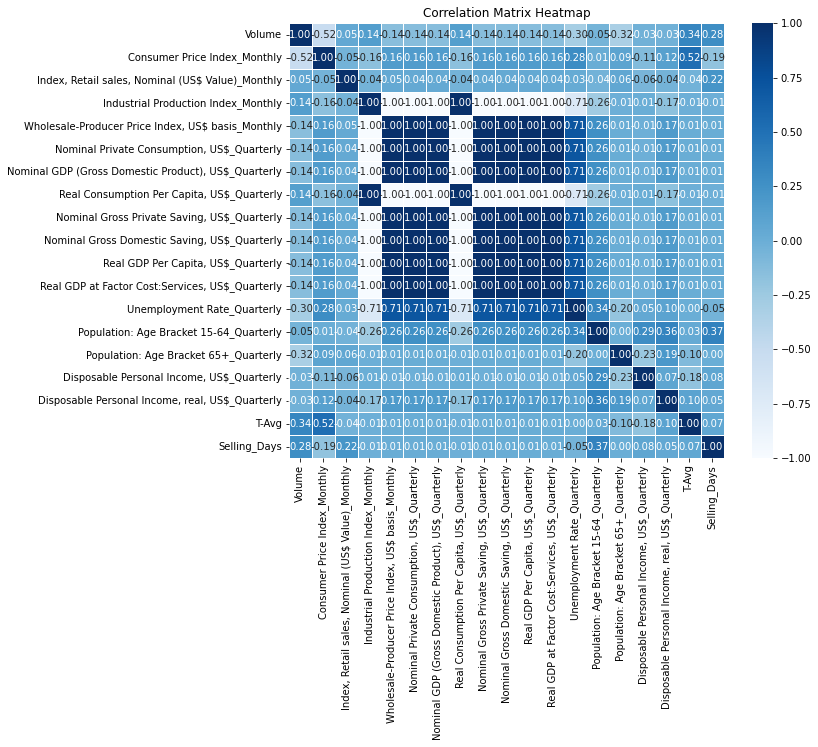

In [130]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [131]:
X.reset_index('Date', inplace=True)

In [132]:
regressors= ['Date','Volume','Consumer Price Index_Monthly', 'Selling_Days',
            'Real Consumption Per Capita, US$_Quarterly']#,'Index, Retail sales, Nominal (US$ Value)_Monthly',
            #'Industrial Production Index_Monthly']

In [133]:
d2=beer_df.copy()

In [134]:
d2= d2.drop(['Volume'], axis=1)
d2= d2.drop(['Beer_Non'], axis=1)

d2.set_index('Date', inplace=True)

In [135]:
normalized_df = (d2-d2.mean())/d2.std()
normalized_df

,Consumer Price Index_Monthly,"Index, Retail sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly","Nominal Private Consumption, US$_Quarterly","Nominal GDP (Gross Domestic Product), US$_Quarterly","Real Consumption Per Capita, US$_Quarterly","Nominal Gross Private Saving, US$_Quarterly","Nominal Gross Domestic Saving, US$_Quarterly","Real GDP Per Capita, US$_Quarterly","Real GDP at Factor Cost:Services, US$_Quarterly",Unemployment Rate_Quarterly,Population: Age Bracket 15-64_Quarterly,Population: Age Bracket 65+_Quarterly,"Disposable Personal Income, US$_Quarterly","Disposable Personal Income, real, US$_Quarterly",T-Avg,Selling_Days
Date,,,,,,,,,,,,,,,,,,
2020-01-01,0.744744,1.234862,-1.551760,1.606738,1.630657,1.630657,-1.630657,1.630657,1.630657,1.630657,1.630657,1.158244,-0.398459,0.630491,-1.017507,0.794089,-1.596047,1.386607
2020-02-01,0.342730,0.772801,-1.694275,1.707853,1.630657,1.630657,-1.630657,1.630657,1.630657,1.630657,1.630657,1.158244,-0.034766,1.214263,-0.599743,0.470537,-0.881399,-1.886695
2020-03-01,-0.059284,-0.912142,-1.593737,1.496779,1.630657,1.630657,-1.630657,1.630657,1.630657,1.630657,1.630657,1.158244,0.347736,0.608690,0.544782,1.109810,-0.166751,0.295507
2020-04-01,0.744744,0.165663,-1.583552,1.523444,1.392605,1.392605,-1.392605,1.392605,1.392605,1.392605,1.392605,0.941749,1.133367,-0.554546,1.439345,1.087131,0.833756,0.295507
2020-05-01,0.342730,-1.382909,-1.250213,1.341887,1.392605,1.392605,-1.392605,1.392605,1.392605,1.392605,1.392605,0.941749,0.328672,-1.608068,-0.347762,0.165988,1.691333,-0.795594
2020-06-01,0.973696,1.234862,-1.320562,1.321106,1.321190,1.321190,-1.321190,1.321190,1.321190,1.321190,1.321190,0.876801,0.851314,-1.362845,1.903707,0.763663,1.262545,0.295507
2020-07-01,0.355450,0.772801,-1.249180,1.249695,1.249774,1.249774,-1.249774,1.249774,1.249774,1.249774,1.249774,0.811853,-0.074445,0.572694,-1.008099,0.209662,0.547897,1.386607
2020-08-01,-0.087267,-0.912142,-1.177799,1.178284,1.178358,1.178358,-1.178358,1.178358,1.178358,1.178358,1.178358,0.746905,1.167402,-0.263186,-0.933551,0.827354,0.333502,-0.795594
2020-09-01,0.519863,0.165663,-1.106417,1.106873,1.106943,1.106943,-1.106943,1.106943,1.106943,1.106943,1.106943,0.681956,-0.256221,1.250906,-0.664771,0.416163,0.262038,0.295507


In [136]:
normalized_df.reset_index('Date', inplace=True)

In [137]:
normalized_df["Volume"]=beer_df["Volume"]

In [138]:
normalized_df.head()

,Date,Consumer Price Index_Monthly,"Index, Retail sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly","Nominal Private Consumption, US$_Quarterly","Nominal GDP (Gross Domestic Product), US$_Quarterly","Real Consumption Per Capita, US$_Quarterly","Nominal Gross Private Saving, US$_Quarterly","Nominal Gross Domestic Saving, US$_Quarterly","Real GDP Per Capita, US$_Quarterly","Real GDP at Factor Cost:Services, US$_Quarterly",Unemployment Rate_Quarterly,Population: Age Bracket 15-64_Quarterly,Population: Age Bracket 65+_Quarterly,"Disposable Personal Income, US$_Quarterly","Disposable Personal Income, real, US$_Quarterly",T-Avg,Selling_Days,Volume
0,2020-01-01,0.744744,1.234862,-1.551760,1.606738,1.630657,1.630657,-1.630657,1.630657,1.630657,1.630657,1.630657,1.158244,-0.398459,0.630491,-1.017507,0.794089,-1.596047,1.386607,525295.37
1,2020-02-01,0.342730,0.772801,-1.694275,1.707853,1.630657,1.630657,-1.630657,1.630657,1.630657,1.630657,1.630657,1.158244,-0.034766,1.214263,-0.599743,0.470537,-0.881399,-1.886695,578702.22
2,2020-03-01,-0.059284,-0.912142,-1.593737,1.496779,1.630657,1.630657,-1.630657,1.630657,1.630657,1.630657,1.630657,1.158244,0.347736,0.608690,0.544782,1.109810,-0.166751,0.295507,696500.24
3,2020-04-01,0.744744,0.165663,-1.583552,1.523444,1.392605,1.392605,-1.392605,1.392605,1.392605,1.392605,1.392605,0.941749,1.133367,-0.554546,1.439345,1.087131,0.833756,0.295507,712376.13
4,2020-05-01,0.342730,-1.382909,-1.250213,1.341887,1.392605,1.392605,-1.392605,1.392605,1.392605,1.392605,1.392605,0.941749,0.328672,-1.608068,-0.347762,0.165988,1.691333,-0.795594,931286.20


In [139]:
normalized_df['Year']=pd.DatetimeIndex(normalized_df.Date).year
normalized_df['Month']=pd.DatetimeIndex(normalized_df.Date).month
normalized_df['monthday']=pd.DatetimeIndex(normalized_df.Date).day
normalized_df['Quarter']=pd.DatetimeIndex(normalized_df.Date).quarter

df_dummies=pd.get_dummies(normalized_df, columns= ['Month','Quarter'])
df_dummies.head()

,Date,Consumer Price Index_Monthly,"Index, Retail sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly","Nominal Private Consumption, US$_Quarterly","Nominal GDP (Gross Domestic Product), US$_Quarterly","Real Consumption Per Capita, US$_Quarterly","Nominal Gross Private Saving, US$_Quarterly","Nominal Gross Domestic Saving, US$_Quarterly",...,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,2020-01-01,0.744744,1.234862,-1.551760,1.606738,1.630657,1.630657,-1.630657,1.630657,1.630657,...,0,0,0,0,0,0,1,0,0,0
1,2020-02-01,0.342730,0.772801,-1.694275,1.707853,1.630657,1.630657,-1.630657,1.630657,1.630657,...,0,0,0,0,0,0,1,0,0,0
2,2020-03-01,-0.059284,-0.912142,-1.593737,1.496779,1.630657,1.630657,-1.630657,1.630657,1.630657,...,0,0,0,0,0,0,1,0,0,0
3,2020-04-01,0.744744,0.165663,-1.583552,1.523444,1.392605,1.392605,-1.392605,1.392605,1.392605,...,0,0,0,0,0,0,0,1,0,0
4,2020-05-01,0.342730,-1.382909,-1.250213,1.341887,1.392605,1.392605,-1.392605,1.392605,1.392605,...,0,0,0,0,0,0,0,1,0,0


In [140]:
corrs=df_dummies.corr()
X1= corrs[corrs.Volume>0.2]['Volume']
X1

T-Avg           0.340252
Selling_Days    0.280597
Volume          1.000000
Month_5         0.341923
Month_6         0.322595
Month_11        0.364526
Month_12        0.406892
Quarter_2       0.354580
Quarter_4       0.302593
Name: Volume, dtype: float64

In [141]:
regressors=regressors+['T-Avg','Month_7','Month_6','Quarter_2','Quarter_4']

In [142]:
regressors

['Date',
 'Volume',
 'Consumer Price Index_Monthly',
 'Selling_Days',
 'Real Consumption Per Capita, US$_Quarterly',
 'T-Avg',
 'Month_7',
 'Month_6',
 'Quarter_2',
 'Quarter_4']

In [143]:
def linReg(Data,train_set,forecast_set):
    X1=Data.loc[(Data.Date<=train_set),:]
    X_Train=X1.drop(['Volume'],axis=1)
    y_Train= X1['Volume']
    
    X2=Data.loc[((Data.Date>train_set) & (Data.Date<=forecast_set)),:]
    X_Test = X2.drop(['Volume'], axis=1)
    y_Test = X2['Volume']
    
    X_Train.set_index('Date', inplace=True)
    X_Test.set_index('Date', inplace=True)
    
    predict_reg = LinearRegression()
    predict_reg.fit(X_Train, y_Train)
    print("Intercept Value of Model is ", predict_reg.intercept_)
    print("Coefficient Value of Model is ", predict_reg.coef_)
    y_pred=predict_reg.predict(X_Test)
    pmsh_pf = pd.DataFrame({'Date':X2.Date, 'Actual':y_Test, 'Predict': y_pred, '%error':abs(y_Test-y_pred)/y_Test*100, 'Accuracy':((y_Test-y_pred)/y_Test)*100})
    coeff = pd.DataFrame((predict_reg.coef_)/10000,X_Train.columns, columns=['Coefficient'])
    print(coeff)
    print("Mean Absolute Error: ", metrics.mean_absolute_error(y_Test,y_pred))
    print("Mean Squared Error: ", metrics.mean_squared_error(y_Test,y_pred))
    print("Root Mean Absolute Error: ", np.sqrt(metrics.mean_squared_error(y_Test,y_pred)))
    print("Accuracy of Model: ", pmsh_pf['Accuracy'].mean())
    print("R^2 Score: ", predict_reg.score(X_Train,y_Train))
    print("Adjusted R Square: ", 1-(1-predict_reg.score(X_Train,y_Train))*(len(y_Train)-1)/(len(y_Train)-X_Train.shape[1]-1))
    
    pmsh_pf['M+3 Actuals']= pmsh_pf.Actual.rolling(3).sum()
    pmsh_pf['M+3 Forecast LR']= pmsh_pf.Predict.rolling(3).sum()
    pmsh_pf['M+3 Accuracy LR']= 1-(abs(pmsh_pf['M+3 Actuals']-pmsh_pf['M+3 Forecast LR']))/pmsh_pf['M+3 Actuals']
    
    return pmsh_pf

In [144]:
Data= df_dummies[regressors]
train_set,forecast_set = '2023-05-01','2023-12-01'
linReg(Data,train_set,forecast_set)

Intercept Value of Model is  719932.0294603023
Coefficient Value of Model is  [-155075.89208841    8688.44538388     842.00149213   66525.10980933
  155408.89649972  161804.40355074  104838.99876386  -28753.45402879]
                                            Coefficient
Consumer Price Index_Monthly                 -15.507589
Selling_Days                                   0.868845
Real Consumption Per Capita, US$_Quarterly     0.084200
T-Avg                                          6.652511
Month_7                                       15.540890
Month_6                                       16.180440
Quarter_2                                     10.483900
Quarter_4                                     -2.875345
Mean Absolute Error:  20691.423708720813
Mean Squared Error:  710244884.4359642
Root Mean Absolute Error:  26650.419967346934
Accuracy of Model:  0.26521310467716425
R^2 Score:  0.9566797820754136
Adjusted R Square:  0.945849727594267


,Date,Actual,Predict,%error,Accuracy,M+3 Actuals,M+3 Forecast LR,M+3 Accuracy LR
41,2023-06-01,922486.23,923189.400050,0.076226,-0.076226,NaN,NaN,NaN
42,2023-07-01,850771.56,850868.092227,0.011346,-0.011346,NaN,NaN,NaN
43,2023-08-01,737689.45,768871.302507,4.226962,-4.226962,2510947.24,2.542929e+06,0.987263
44,2023-09-01,700689.56,651066.186956,7.082077,7.082077,2289150.57,2.270806e+06,0.991986
45,2023-10-01,621820.12,639910.484001,2.909260,-2.909260,2060199.13,2.059848e+06,0.999830
46,2023-11-01,942276.89,955098.809755,1.360738,-1.360738,2264786.57,2.246075e+06,0.991738
47,2023-12-01,962288.36,929965.605622,3.358947,3.358947,2526385.37,2.524975e+06,0.999442
